In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

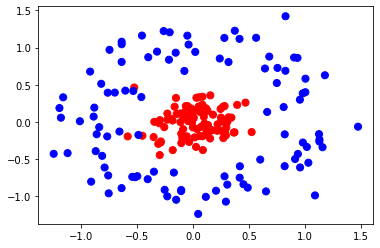

In [9]:
from sklearn.datasets._samples_generator import make_circles
x,y = make_circles(200, factor=.1, noise= .2)
plt.scatter(x[:,0],x[:,1],c= y, s= 50, cmap='bwr')

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [11]:
lin_mod = SVC(kernel='linear')
lin_mod.fit(x_train,y_train.ravel())
pred = lin_mod.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_test,pred)

0.65

In [20]:
def plot_3d_plot(x, y):
    r = np.exp(-(x ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(x[:, 0], x[:, 1], r, c=y, s=50, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3DSubplot:xlabel='X1', ylabel='X2'>

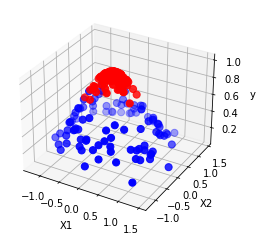

In [21]:
plot_3d_plot(x,y)

In [22]:
rbf_mod = SVC(kernel='rbf')
rbf_mod.fit(x_train,y_train)
rbf_pred = rbf_mod.predict(x_test)

hence we obtain 100 percent accuracy


In [23]:
accuracy_score(y_test,rbf_pred)

1.0

you can ignore this given function below as it only use to show the plots of our model

In [25]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


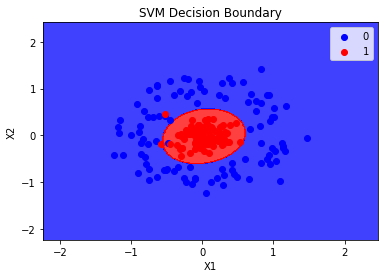

In [26]:
plot_decision_boundary(x,y,rbf_mod)